# **Suryakanta Karan (M22AIE207) m22aie207@iitj.ac.in**

In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
os.chdir('/content/drive/My Drive/surya/ML_Assignment/gurmukhi/')

Mounted at /content/drive


In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import datasets, layers, models

In [ ]:
def plot_loss_accuracy(history):
    '''
    A function to plot train and validation loss against epochs of training
    '''
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    plt.figure(figsize=(8, 8))
    plt.subplot(2, 1, 1)
    plt.plot(acc, label='Training Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.ylabel('Accuracy')
    plt.ylim([min(plt.ylim()),1])
    plt.title('Training and Validation Accuracy')

    plt.subplot(2, 1, 2)
    plt.plot(loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.ylabel('Cross Entropy')
    plt.ylim([0,3.0])
    plt.title('Training and Validation Loss')
    plt.xlabel('epoch')
    plt.show()

In [ ]:
#train_data_path = 'gurumukhi_digits_dataset/train'
train_data_path = '/content/drive/MyDrive/surya/ML_Assignment/gurmukhi/train'
#val_data_path = 'gurumukhi_digits_dataset/val'
val_data_path = '/content/drive/MyDrive/surya/ML_Assignment/gurmukhi/val'

IMAGE_SIZE = 32
IMAGE_SHAPE = (IMAGE_SIZE, IMAGE_SIZE, 1) # 3 channels
NUM_OF_CLASSES = 10

ROTATION_RANGE = 15 # in degree
SHEAR_RANGE = 15 # in degree


# Adding random rotation and shear
train_image_generator = ImageDataGenerator(
    rescale=1./255,
    rotation_range= ROTATION_RANGE,
    shear_range=  SHEAR_RANGE,
    # preprocessing_function= lambda img: np.where(img < 1, 0.0, 1.0), # converting fractions to 0
    fill_mode= 'constant',
    cval= 255.0 # filling white values
    )

val_image_generator = ImageDataGenerator( rescale=1./255 ) # no deformations for validation data

train_data_gen = train_image_generator.flow_from_directory(
    train_data_path,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    color_mode='grayscale', # for 1 channel images
    class_mode='sparse', # labels will be integers
    batch_size=32,
    shuffle=True,
    seed=None,
    )

val_data_gen = val_image_generator.flow_from_directory(
    val_data_path,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    color_mode='grayscale', # for 1 channel images
    class_mode='sparse', # labels will be integers
    batch_size=32,
    shuffle=True,
    seed=None,
    )


Found 1000 images belonging to 10 classes.
Found 178 images belonging to 10 classes.


/usr/local/lib/python3.9/dist-packages/keras/preprocessing/image.py:202: UserWarning: Using ".tiff" files with multiple bands will cause distortion. Please verify your output.
  warnings.warn(


shape of a batch given by image data generator : (32, 32, 32)


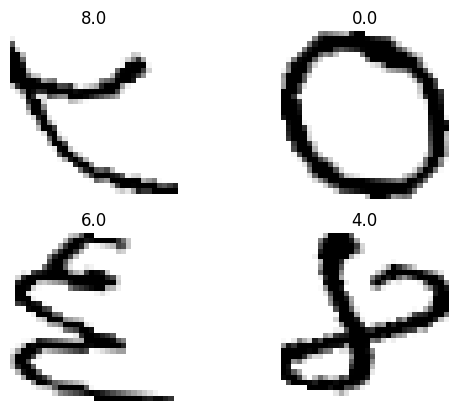

In [ ]:
# checking/ validating some images generated by datagenerator

# This function will plot 4 images along with their labels.
def plotImages(image_datas,y_list):
    f, axarr = plt.subplots(2,2)
    axarr[0,0].imshow(image_datas[0], cmap='gray')
    axarr[0,0].set_title(y_list[0])
    axarr[0,0].axis('off')
    axarr[0,1].imshow(image_datas[1], cmap='gray')
    axarr[0,1].set_title(y_list[1])
    axarr[0,1].axis('off')
    axarr[1,0].imshow(image_datas[2], cmap='gray')
    axarr[1,0].set_title(y_list[2])
    axarr[1,0].axis('off')
    axarr[1,1].imshow(image_datas[3], cmap='gray')
    axarr[1,1].set_title(y_list[3])
    axarr[1,1].axis('off')

sample_training_images, y_list = next(train_data_gen)
sample_training_images = np.squeeze(sample_training_images) # to reduce dimension
print("shape of a batch given by image data generator : {}".format(sample_training_images.shape))

plotImages(sample_training_images[:4],y_list[:4])

In [ ]:
# Trying a simple 1 layer NN : to get a baseline
# TODO : make some variables to define learning rate, optimizer, etc.

def create_1_layer_NN():
    model = tf.keras.models.Sequential([
        layers.Flatten(input_shape = IMAGE_SHAPE),
        layers.Dense(NUM_OF_CLASSES, activation='softmax')
    ])

    model.compile(optimizer=tf.keras.optimizers.Adam(),
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

    return model

In [ ]:
one_layer_NN_model = create_1_layer_NN()
one_layer_NN_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 1024)              0         
                                                                 
 dense (Dense)               (None, 10)                10250     
                                                                 
Total params: 10,250
Trainable params: 10,250
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# training

one_layer_NN_checkpoint_filepath = 'one_layer_NN/checkpoint/'
one_layer_NN_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=one_layer_NN_checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

one_layer_NN_model_history = one_layer_NN_model.fit(train_data_gen, epochs=100,
                    validation_data=val_data_gen,
                    callbacks=[one_layer_NN_checkpoint_callback])

Epoch 1/100
32/32 [==============================] - 242s 8s/step - loss: 1.7397 - accuracy: 0.4300 - val_loss: 1.2586 - val_accuracy: 0.6348
Epoch 2/100
32/32 [==============================] - 4s 114ms/step - loss: 0.8390 - accuracy: 0.8110 - val_loss: 0.7800 - val_accuracy: 0.8034
Epoch 3/100
32/32 [==============================] - 3s 107ms/step - loss: 0.5494 - accuracy: 0.8800 - val_loss: 0.6068 - val_accuracy: 0.8371
Epoch 4/100
32/32 [==============================] - 3s 104ms/step - loss: 0.4495 - accuracy: 0.8940 - val_loss: 0.5332 - val_accuracy: 0.8652
Epoch 5/100
32/32 [==============================] - 3s 108ms/step - loss: 0.3875 - accuracy: 0.9060 - val_loss: 0.4444 - val_accuracy: 0.8876
Epoch 6/100
32/32 [==============================] - 4s 114ms/step - loss: 0.3308 - accuracy: 0.9180 - val_loss: 0.3849 - val_accuracy: 0.8820
Epoch 7/100
32/32 [==============================] - 3s 102ms/step - loss: 0.3136 - accuracy: 0.9210 - val_loss: 0.3481 - val_accuracy: 0.8933


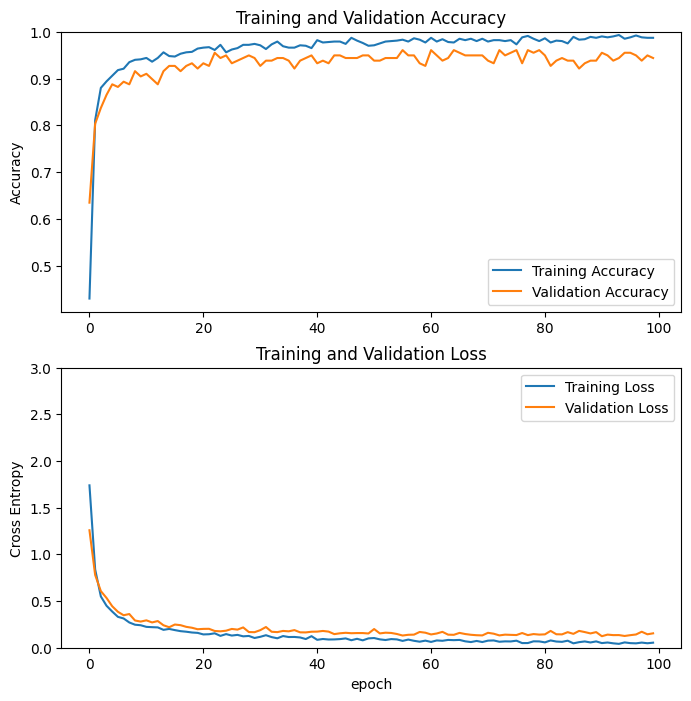

In [ ]:
plot_loss_accuracy(one_layer_NN_model_history)

In [ ]:
# checking the model with saved weights by evaluating on validation data
one_layer_NN_checkpoint_filepath = 'one_layer_NN/checkpoint/'

one_layer_NN_model.load_weights(one_layer_NN_checkpoint_filepath)
one_layer_NN_model.evaluate(val_data_gen)

6/6 [==============================] - 1s 97ms/step - loss: 0.1307 - accuracy: 0.9607


[0.13067297637462616, 0.9606741666793823]

**Observations with 1 layer NN (i.e. no hidden layer) with image augmentation**



Less overfitting than the one without image augmentation
Better validation accuracy (96.07%) for best weights, but hovered around 96% (similar to w/o augmentation)
Lower loss validation dataset when compared with the one w/o image augmentation

#** Now trying hidden layers**

In [ ]:
# Trying NN with 1 hidden layer

def create_1_hidden_layer_NN():
    model = tf.keras.models.Sequential([
        layers.Flatten(input_shape = IMAGE_SHAPE),
        layers.Dense(2048, activation='relu'),
        layers.Dense(NUM_OF_CLASSES, activation='softmax')
    ])

    model.compile(optimizer=tf.keras.optimizers.Adam(),
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

    return model

In [ ]:
one_hidden_layer_NN = create_1_hidden_layer_NN()
one_hidden_layer_NN.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 2048)              2099200   
                                                                 
 dense_2 (Dense)             (None, 10)                20490     
                                                                 
Total params: 2,119,690
Trainable params: 2,119,690
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# training

one_hidden_layer_NN_checkpoint_filepath = 'one_hidden_layer_NN/checkpoint/'
one_hidden_layer_NN_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=one_hidden_layer_NN_checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)


one_hidden_layer_NN_history = one_hidden_layer_NN.fit(train_data_gen, epochs=64,
                    validation_data=val_data_gen,
                    callbacks=[one_hidden_layer_NN_checkpoint_callback])

Epoch 1/64
32/32 [==============================] - 5s 152ms/step - loss: 0.0204 - accuracy: 0.9970 - val_loss: 0.1041 - val_accuracy: 0.9719
Epoch 2/64
32/32 [==============================] - 5s 150ms/step - loss: 0.0250 - accuracy: 0.9880 - val_loss: 0.0770 - val_accuracy: 0.9719
Epoch 3/64
32/32 [==============================] - 7s 221ms/step - loss: 0.0156 - accuracy: 0.9970 - val_loss: 0.1099 - val_accuracy: 0.9607
Epoch 4/64
32/32 [==============================] - 9s 269ms/step - loss: 0.0136 - accuracy: 0.9960 - val_loss: 0.1163 - val_accuracy: 0.9663
Epoch 5/64
32/32 [==============================] - 9s 258ms/step - loss: 0.0299 - accuracy: 0.9890 - val_loss: 0.1198 - val_accuracy: 0.9607
Epoch 6/64
32/32 [==============================] - 11s 351ms/step - loss: 0.0174 - accuracy: 0.9950 - val_loss: 0.0473 - val_accuracy: 0.9775
Epoch 7/64
32/32 [==============================] - 8s 261ms/step - loss: 0.0162 - accuracy: 0.9960 - val_loss: 0.0596 - val_accuracy: 0.9888
Epoch

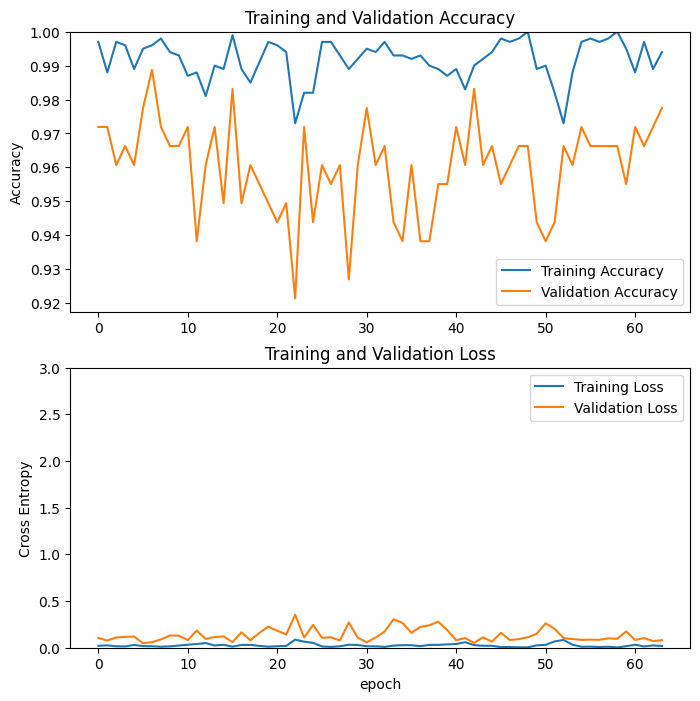

In [ ]:
plot_loss_accuracy(one_hidden_layer_NN_history)

Observations for 1 hidden layer NN :
Hidden layer with 5 units :

Poor learner : heavy underfitting
Training and validation accuracy : 50-60%
Hidden layer with 10 units :

Better learner than the one with 5 units : but still a poor lerarner
Slight overfitting : Training accuracy reaches 90% but validation accuracy reaches ~85-88%
Worse performer than 1-Layer-NN with no hidden layer
Hidden layer with 16 units :

Performs better than the one with 10 units
Negligible overfitting : Training and validation accuracy reaches ~96%
Still no improvement over 1-Layer-NN with no hidden layer in validation accuracy but better in overfitting
Hidden layer with 32 units :

Performs slightly better than 16 units
Slight overfitting : training accuracy : 98% validation accuracy: 97.12% : in best case
Hidden layer with 64 units :

Almost no overfitting for first 50 epochs
Best weights : validation accuracy: 97.75% and no overfit (epoch 32)
Hidden layer with 512 units : BEST YET

Very Less overfitting for first 50 epochs
Best weights : validation accuracy: 98.31% and no overfit (train acc = 98.20%)
Hidden layer with >512 units : perform very similar to the 512 units one

Diminishing return : i.e. no point in using layers wider than 512

# **Now trying multiple hidden layers**

In [ ]:
# now trying NN with multiple hidden layers

def create_multi_hidden_layer_NN():
    model = tf.keras.models.Sequential([
        layers.Flatten(input_shape = IMAGE_SHAPE),
        layers.Dense(1024, activation='relu'),
        layers.Dense(1024, activation='relu'),
        # layers.Dense(512, activation='relu'),
        layers.Dense(NUM_OF_CLASSES, activation='softmax')
    ])

    model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

    return model

In [ ]:
multi_hidden_layer_NN = create_multi_hidden_layer_NN()
multi_hidden_layer_NN.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 1024)              0         
                                                                 
 dense_3 (Dense)             (None, 1024)              1049600   
                                                                 
 dense_4 (Dense)             (None, 1024)              1049600   
                                                                 
 dense_5 (Dense)             (None, 10)                10250     
                                                                 
Total params: 2,109,450
Trainable params: 2,109,450
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# training

multi_hidden_layer_NN_checkpoint_filepath = 'multi_hidden_layer_NN/checkpoint/'
multi_hidden_layer_NN_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=multi_hidden_layer_NN_checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

multi_hidden_layer_NN_history = multi_hidden_layer_NN.fit(train_data_gen, epochs=50,
                    validation_data=val_data_gen,
                    callbacks=[multi_hidden_layer_NN_checkpoint_callback])

Epoch 1/50
32/32 [==============================] - 7s 166ms/step - loss: 1.5566 - accuracy: 0.5730 - val_loss: 0.7113 - val_accuracy: 0.7528
Epoch 2/50
32/32 [==============================] - 4s 137ms/step - loss: 0.3951 - accuracy: 0.8650 - val_loss: 0.3018 - val_accuracy: 0.8764
Epoch 3/50
32/32 [==============================] - 5s 152ms/step - loss: 0.2930 - accuracy: 0.8970 - val_loss: 0.5665 - val_accuracy: 0.8258
Epoch 4/50
32/32 [==============================] - 5s 152ms/step - loss: 0.2564 - accuracy: 0.9070 - val_loss: 0.2213 - val_accuracy: 0.9494
Epoch 5/50
32/32 [==============================] - 4s 136ms/step - loss: 0.2361 - accuracy: 0.9220 - val_loss: 0.3571 - val_accuracy: 0.8876
Epoch 6/50
32/32 [==============================] - 6s 182ms/step - loss: 0.2238 - accuracy: 0.9300 - val_loss: 0.2579 - val_accuracy: 0.9101
Epoch 7/50
32/32 [==============================] - 4s 139ms/step - loss: 0.2012 - accuracy: 0.9280 - val_loss: 0.1793 - val_accuracy: 0.9494
Epoch 

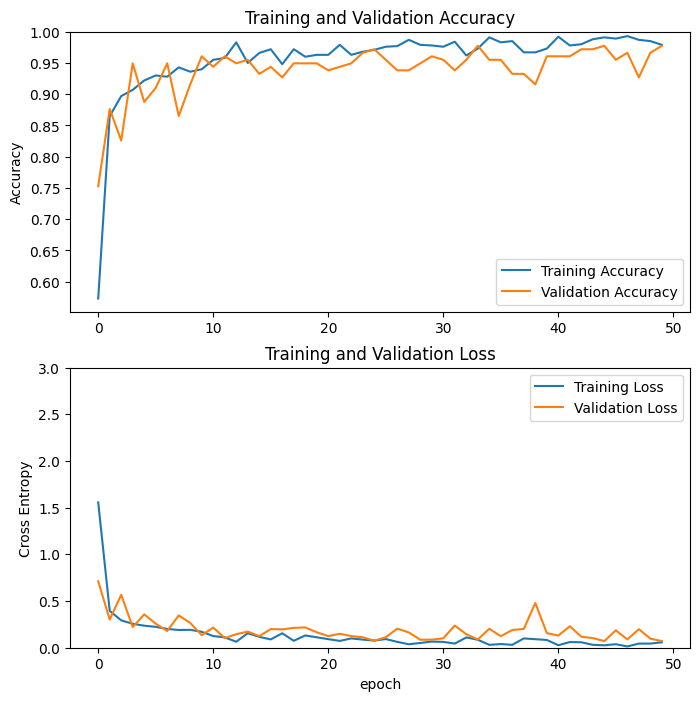

In [ ]:
plot_loss_accuracy(multi_hidden_layer_NN_history)

In [ ]:
multi_hidden_layer_NN_checkpoint_filepath = 'multi_hidden_layer_NN/checkpoint/'

multi_hidden_layer_NN.load_weights(multi_hidden_layer_NN_checkpoint_filepath)
multi_hidden_layer_NN.evaluate(val_data_gen)
multi_hidden_layer_NN.evaluate(train_data_gen)

32/32 [==============================] - 3s 90ms/step - loss: 0.0337 - accuracy: 0.9880


[0.03366182744503021, 0.9879999756813049]

**Some observations : no/ very less overfitting**

(16,16) : val accuracy : 97.19%

(512, 512) : val accuracy : 98.31% (train 99.40%)

(1024, 512) : val accuracy : 97.75% (train 97.00%)

(1024, 1024) : val accuracy : 98.88% (train 98.70%)

(1024, 1024, 512) : val accuracy : 97.75% (train 97.60%)

(1500, 1000, 500) : val accuracy : 98.31% (train 97.60%)

(2000, 1500, 1000, 500) : val accuracy : 98.31% (train 98.40%)

In [ ]:
multi_hidden_layer_NN.save('multi_hidden_layer_NN.h5')

These observations represent the validation and train accuracies for different neural network architectures used for a particular task. The absence of overfitting means that the model is not just memorizing the training data but also generalizing well to the unseen validation data.

The architectures mentioned here are represented by their layer sizes. For example, (16,16) represents a neural network with two layers, each having 16 neurons. Similarly, (512, 512) represents a neural network with two hidden layers, each having 512 neurons.

The validation accuracy measures how well the model performs on the validation set, which is a subset of the data that the model has not seen during training. The training accuracy measures how well the model performs on the data it was trained on. A high difference between training and validation accuracy indicates overfitting, which means that the model is too complex and memorizes the training data instead of learning a general pattern.

From the observations, we can conclude that different architectures perform differently for the task at hand. The (512, 512) and (1024, 1024) architectures perform well with high validation accuracy and train accuracy, indicating good generalization ability. The other architectures also perform well, but with slightly lower validation accuracy.